Step 1 : Import All Required Libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Step 2 : File Path Validation

In [89]:
file_path = r"C:\Users\Nikhil\Downloads\Unemployment in India.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

In [ ]:
Step 3 : Loading The Dataset

In [70]:
data = pd.read_csv(file_path)
print("Dataset Information:")
print(data.info())
print("\nDataset Preview:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None

Dataset Preview:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1 

Step 4 : Cleaning The Dataset

In [85]:
data_cleaned = data.dropna().copy() 
data_cleaned.columns = [col.strip() for col in data_cleaned.columns] 
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], dayfirst=True)
print("\nCleaned Dataset Preview:")
print(data_cleaned.head())
print("\nCleaned Dataset Information:")
print(data_cleaned.info())


Cleaned Dataset Preview:
           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  

Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 t

Step 5 : Analyzing 

In [80]:
unemployment_stats = data_cleaned['Estimated Unemployment Rate (%)'].describe()
avg_unemployment_by_region = (
    data_cleaned.groupby('Region')['Estimated Unemployment Rate (%)']
    .mean()
    .sort_values()
)
print("\nUnemployment Statistics:")
print(unemployment_stats)
print("\nAverage Unemployment by Region:")
print(avg_unemployment_by_region)


Unemployment Statistics:
count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Estimated Unemployment Rate (%), dtype: float64

Average Unemployment by Region:
Region
Meghalaya            4.798889
Odisha               5.657857
Assam                6.428077
Uttarakhand          6.582963
Gujarat              6.663929
Karnataka            6.676071
Sikkim               7.249412
Madhya Pradesh       7.406429
Andhra Pradesh       7.477143
Maharashtra          7.557500
Telangana            7.737857
West Bengal          8.124643
Chhattisgarh         9.240357
Goa                  9.274167
Tamil Nadu           9.284286
Kerala              10.123929
Puducherry          10.215000
Punjab              12.031071
Uttar Pradesh       12.551429
Rajasthan           14.058214
Chandigarh          15.991667
Jammu & Kashmir     16.188571
Delhi               16.495357
Himachal Pradesh    18.540357


Step 6 : Plot Unemployment Trends Over Time

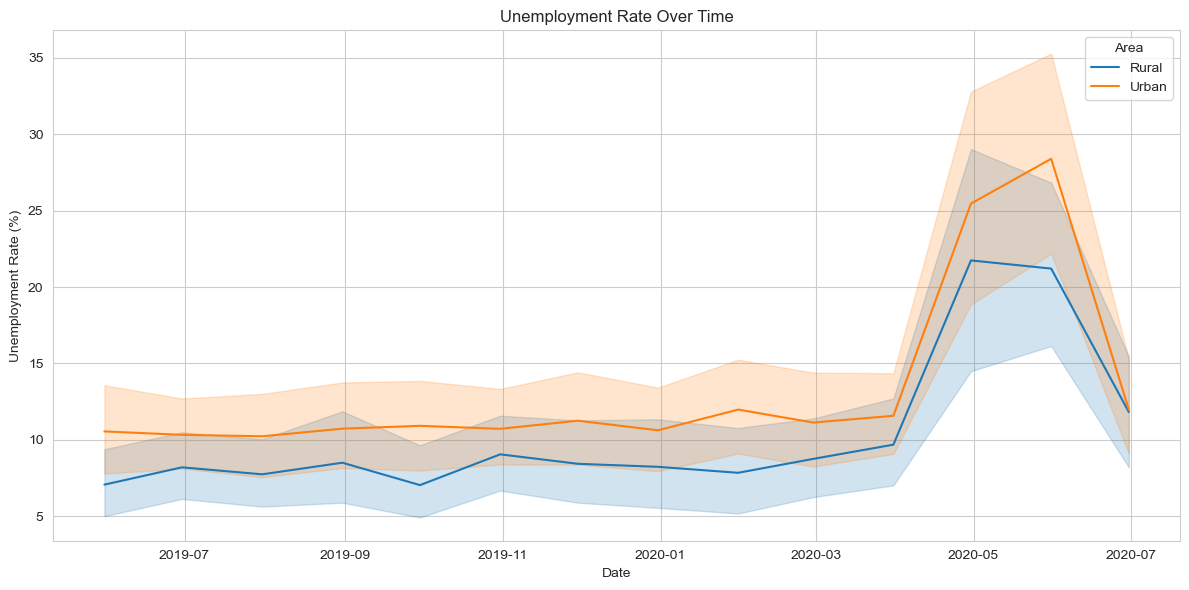

In [83]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_cleaned, x='Date', y='Estimated Unemployment Rate (%)', hue='Area')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Area', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()